# 多层感知机实战

In [1]:
#导入工具包
import torch
from torch import nn
from ylml import ylnn
from ylml.ml import Train
%matplotlib inline

## 加载FashionMNIST数据集并展示

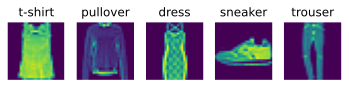

In [2]:
batch_size = 2048
FashionMNIST_MLP_ =ylnn.FashionMNIST_MLP(download = True,batch_size = batch_size)
FashionMNIST_MLP_train_dataloader,FashionMNIST_MLP_valid_dataloader = FashionMNIST_MLP_.get_dataloader()
FashionMNIST_MLP_.show_FashionMNIST()

## 定义MLP模型

In [3]:
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
mlp = ylnn.MLP(784,[256,128],10).to(device)
print(mlp)

MLP(
  (activationFunction): ReLU()
  (model): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


## 定义损失函数优化器

In [4]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp.parameters(),lr = 0.1,momentum=0.9)

## 定义训练器并开始训练

In [5]:
train = Train(10,loss_function,optimizer,mlp,task_type = 'Multi_CLS',device = device)
train.start_train(FashionMNIST_MLP_train_dataloader,FashionMNIST_MLP_valid_dataloader,1)

Train_set Epoch [0/10] loss: 2.1140615940093994, acc: 0.1142
Start Validation!
Valid_set Epoch [1/10] loss: 2.0781807899475098, acc: 0.2016
Stop Validation!
Train_set Epoch [1/10] loss: 1.2699931859970093, acc: 0.4581
Start Validation!
Valid_set Epoch [2/10] loss: 1.2500407695770264, acc: 0.529
Stop Validation!
Train_set Epoch [2/10] loss: 0.6193174123764038, acc: 0.6743
Start Validation!
Valid_set Epoch [3/10] loss: 0.7007509469985962, acc: 0.7385
Stop Validation!
Train_set Epoch [3/10] loss: 0.5336057543754578, acc: 0.7805
Start Validation!
Valid_set Epoch [4/10] loss: 0.5917022228240967, acc: 0.7902
Stop Validation!
Train_set Epoch [4/10] loss: 0.451369047164917, acc: 0.8201
Start Validation!
Valid_set Epoch [5/10] loss: 0.4784604609012604, acc: 0.8261
Stop Validation!
Train_set Epoch [5/10] loss: 0.4400210678577423, acc: 0.8382
Start Validation!
Valid_set Epoch [6/10] loss: 0.46387484669685364, acc: 0.838
Stop Validation!
Train_set Epoch [6/10] loss: 0.4189188480377197, acc: 0.851


## 展示损失和准确率图像

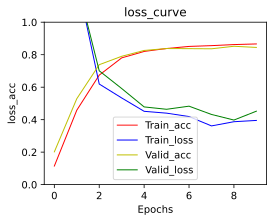

In [6]:
train.show_loss_acc_value()

## 预测结果展示

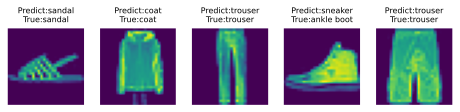

In [7]:
FashionMNIST_MLP_.show_FashionMNIST_predict(mlp)